In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Create Points to cluster
Points = pd.DataFrame()
Points.loc[:,0] = [1.91,0.9,1.26,0.61,1.25,1.04,0.53,0.99,1.11,0.1,-0.15,0.83,0.72,0.69,0.74,
      0.72,1.09,0.68,0.67,0.82,0.74,0.94,0.64,1.44,0.76,1.06,0.79,0.88,0.76,0.85,
      0.88,0.75,0.83,0.85,0.35,0.63,-0.14,-0.04,0.3,-0.52,-0.27,-0.32,-0.08,-0.39,
      -0.06,0.09,-0.51,-0.22,-0.03,-0.12,0.01,-0.21,-0.21,0.37,1.18,0,0,-0.66,-0.1,
      1.01,1.19,-0.3,-2.2,-1.82,-1.33,-0.84,-2.17,-1.67,-1.38,-1.39,-1.32,-1.49,
      -2.16,-1.64,-1.44,-1.58,-1.53,-1.53,-0.27,-1.32,-0.89,-0.33,-1.29]
Points.loc[:,1] = [1.43,0.79,0.52,1.55,0.66,0.62,1.33,1.27,1.04,2.41,1.83,1.02,1.17,0.97,0.91,
      0.14,0.53,1.15,0.96,0.87,0.27,-0.15,0.82,0.72,0.84,1.52,0.93,0.91,0.87,0.93,
      0.97,1,0.86,0.88,0.55,-1.99,-0.78,-0.32,0.67,-1.75,-0.7,-0.51,-0.37,-0.55,
      -0.42,-0.48,0.64,-0.49,-0.51,-0.32,-0.48,-0.57,-0.32,-0.28,-1.51,-0.41,-0.44,
      -2.27,-0.67,-0.32,0.43,-1.26,-1.85,-0.16,-0.89,0.05,-0.38,-0.53,-1.75,-0.98,
      -0.33,-1.41,-1.33,-0.9,-0.72,-0.77,-0.66,-0.81,-0.87,-0.94,-1.73,0.55,-0.7]

In [10]:
# Create initial cluster centroids
ClusterCentroidGuesses = pd.DataFrame()
ClusterCentroidGuesses.loc[:,0] = [-1, 1, 0]
ClusterCentroidGuesses.loc[:,1] = [2, -2, 0]

In [11]:
def FindLabelOfClosest(Points, ClusterCentroids): # determine Labels from Points and ClusterCentroids
    NumberOfClusters, NumberOfDimensions = ClusterCentroids.shape # dimensions of the initial Centroids
    Distances = np.array([float('inf')]*NumberOfClusters) # centroid distances
    NumberOfPoints, NumberOfDimensions = Points.shape
    Labels = np.array([-1]*NumberOfPoints)
    for PointNumber in range(NumberOfPoints): # assign labels to all data points            
        for ClusterNumber in range(NumberOfClusters): # for each cluster
            # Get distances for each cluster
            Distances[ClusterNumber] = np.sqrt(sum((Points.loc[PointNumber,:] - ClusterCentroids.loc[ClusterNumber,:])**2))                
        Labels[PointNumber] = np.argmin(Distances) # assign to closest cluster
    return Labels # return the a label for each point

In [12]:
def CalculateClusterCentroid(Points, Labels): # determine centroid of Points with the same label
    ClusterLabels = np.unique(Labels) # names of labels
    NumberOfPoints, NumberOfDimensions = Points.shape
    ClusterCentroids = pd.DataFrame(np.array([[float('nan')]*NumberOfDimensions]*len(ClusterLabels)))
    for ClusterNumber in ClusterLabels: # for each cluster
        # get mean for each label 
        ClusterCentroids.loc[ClusterNumber, :] = np.mean(Points.loc[ClusterNumber == Labels, :])
    return ClusterCentroids # return the a label for each point

In [13]:
def KMeans(Points, ClusterCentroidGuesses):
    ClusterCentroids = ClusterCentroidGuesses.copy()
    Labels_Previous = None
    # Get starting set of labels
    Labels = FindLabelOfClosest(Points, ClusterCentroids)
    while not np.array_equal(Labels, Labels_Previous):
        # Re-calculate cluster centers based on new set of labels
        ClusterCentroids = CalculateClusterCentroid(Points, Labels)
        Labels_Previous = Labels.copy() # Must make a deep copy
        # Determine new labels based on new cluster centers
        Labels = FindLabelOfClosest(Points, ClusterCentroids)
    return Labels, ClusterCentroids

In [14]:
def Plot2DKMeans(Points, Labels, ClusterCentroids, Title):
    for LabelNumber in range(max(Labels)+1):
        LabelFlag = Labels == LabelNumber
        color =  ['c', 'm', 'y', 'b', 'g', 'r', 'c', 'm', 'y', 'b', 'g', 'r', 'c', 'm', 'y'][LabelNumber]
        marker = ['s', 'o', 'v', '^', '<', '>', '8', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'][LabelNumber]
        plt.scatter(Points.loc[LabelFlag,0], Points.loc[LabelFlag,1],
                    s= 100, c=color, edgecolors="black", alpha=0.3, marker=marker)
        plt.scatter(ClusterCentroids.loc[LabelNumber,0], ClusterCentroids.loc[LabelNumber,1], s=200, c="black", marker=marker)
    plt.title(Title)
    plt.show()

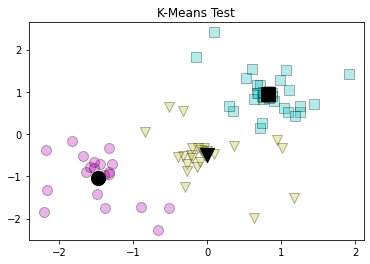

In [15]:
Labels, ClusterCentroids = KMeans(Points, ClusterCentroidGuesses)
Title = 'K-Means Test'
Plot2DKMeans(Points, Labels, ClusterCentroids, Title)


In [16]:
# Change the plot dimensions
plt.rcParams["figure.figsize"] = [8, 8] # Square
# plt.rcParams["figure.figsize"] = [8, 0.5] # Wide
# plt.rcParams["figure.figsize"] = [0.5, 8] # Tall

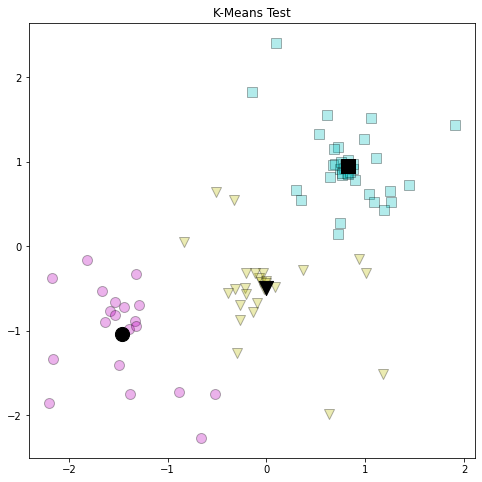

In [17]:
# Visualize the results of the K-Means clustering
Title = 'K-Means Test'
Plot2DKMeans(Points, Labels, ClusterCentroids, Title)

## KMeansNorm

In [18]:
def KMeansNorm(Points, ClusterCentroidGuesses, NormD1, NormD2):
    PointsNorm = Points.copy()
    ClusterCentroids = ClusterCentroidGuesses.copy()
    if NormD1:
        # Determine mean of 1st dimension in Points
        mu1 = np.mean(Points.loc[:, 0])
        # Determine standard deviation of 1st dimension in Points
        sigma1 = np.std(Points.loc[:, 0])
        # Normalize 1st dimension of Points
        PointsNorm.loc[:, 0] = (Points.loc[:, 0] - mu1)/sigma1
        # Normalize 1st dimension of ClusterCentroids
        ClusterCentroids.loc[:, 0] = (ClusterCentroids.loc[:, 0] - mu1)/sigma1
    if NormD2:
        # Determine mean of 2nd dimension in Points
        mu2 = np.mean(Points.loc[:, 1])
        # Determine standard deviation of 2nd dimension in Points
        sigma2 = np.std(Points.loc[:, 1])
        # Normalize 2nd dimension of Points
        PointsNorm.loc[:, 1] = (Points.loc[:, 1] - mu2)/sigma2
        # Normalize 2nd dimension of ClusterCentroids
        ClusterCentroids.loc[:, 1] = (ClusterCentroids.loc[:, 1] - mu2)/sigma2
    # Do actual clustering of (non)normalized points
    Labels, ClusterCentroids = KMeans(PointsNorm, ClusterCentroids)
    if NormD1:
        # Denormalize 1st dimension
        ClusterCentroids.loc[:, 0] = ClusterCentroids.loc[:, 0]*sigma1 + mu1
    if NormD2:
        # Denormalize 2nd dimension
        ClusterCentroids.loc[:, 1] = ClusterCentroids.loc[:, 1]*sigma2 + mu2
    return Labels, ClusterCentroids

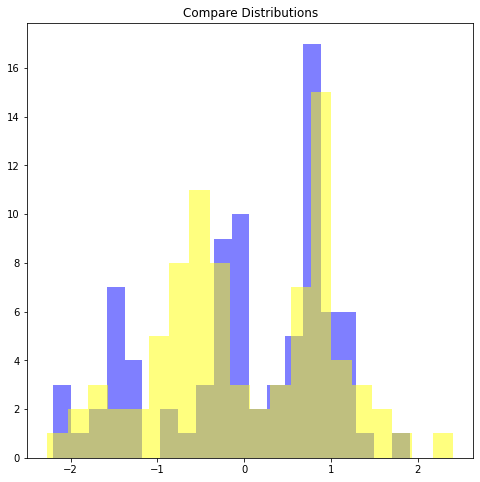

In [19]:
# Compare distributions of the two dimensions
plt.hist(Points.loc[:,0], bins = 20, color=[0, 0, 1, 0.5])
plt.hist(Points.loc[:,1], bins = 20, color=[1, 1, 0, 0.5])
plt.title("Compare Distributions")
plt.show()

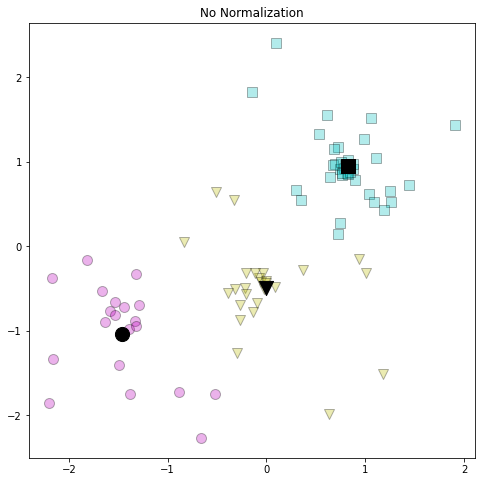

In [20]:
# Cluster without normalization
# Set Normalizations to false
NormD1 = False
NormD2 = False
Labels, ClusterCentroids = KMeansNorm(Points, ClusterCentroidGuesses, NormD1, NormD2)
Title = 'No Normalization'
Plot2DKMeans(Points, Labels, ClusterCentroids, Title)

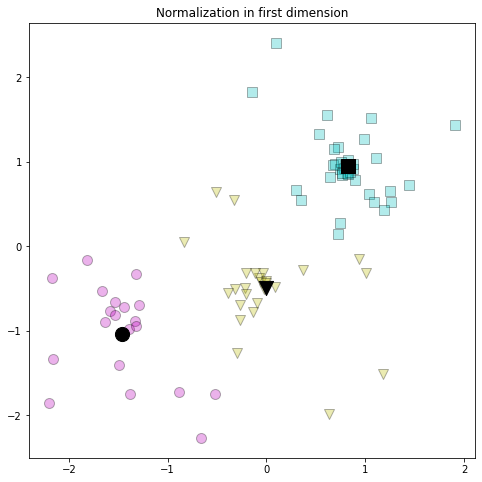

In [21]:
# Cluster with 1st dimension normalized
# Set Normnalizations
NormD1 = True
NormD2 = False
Labels, ClusterCentroids = KMeansNorm(Points, ClusterCentroidGuesses, NormD1, NormD2)
Title = 'Normalization in first dimension'
Plot2DKMeans(Points, Labels, ClusterCentroids, Title)

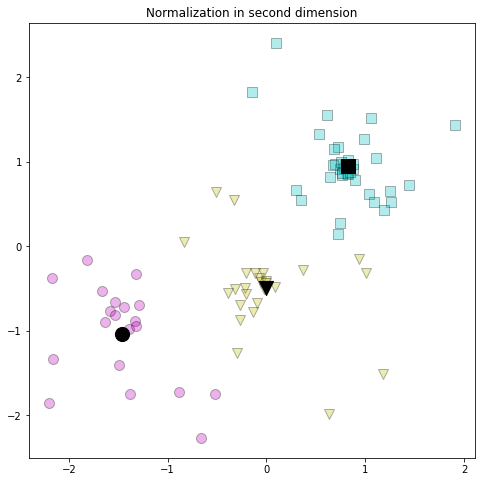

In [22]:
# Cluster with 2nd dimension normalized
NormD1 = False
NormD2 = True
Labels, ClusterCentroids = KMeansNorm(Points, ClusterCentroidGuesses, NormD1, NormD2)
Title = 'Normalization in second dimension'
Plot2DKMeans(Points, Labels, ClusterCentroids, Title)

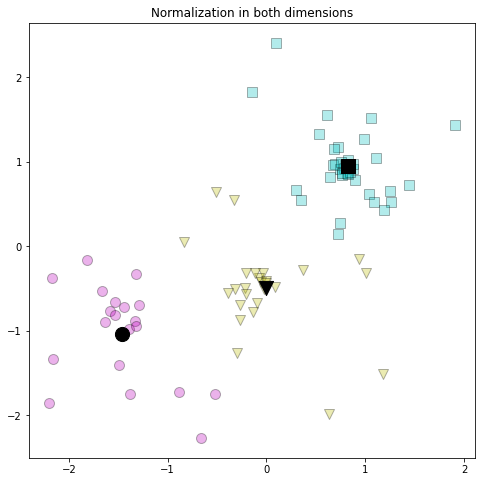

In [23]:
# Cluster with both dimensions normalized
NormD1 = True
NormD2 = True
Labels, ClusterCentroids = KMeansNorm(Points, ClusterCentroidGuesses, NormD1, NormD2)
Title = 'Normalization in both dimensions'
Plot2DKMeans(Points, Labels, ClusterCentroids, Title)
